In [15]:
%matplotlib notebook
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
sym.init_printing(use_latex='mathjax')

## Lineal

In [28]:
P1=[0,1]
P2=[1,0]

x=np.array([[1,0],[1,1]])
y=np.array([1,0])
b0,b1 = np.linalg.inv(x).dot(y)
b0,b1

(1.0, -1.0)

In [29]:
sym.init_printing(use_latex='mathjax')

In [30]:
sym.var('x')
y=b1*x+b0
y

-1.0⋅x + 1.0

<IPython.core.display.Javascript object>


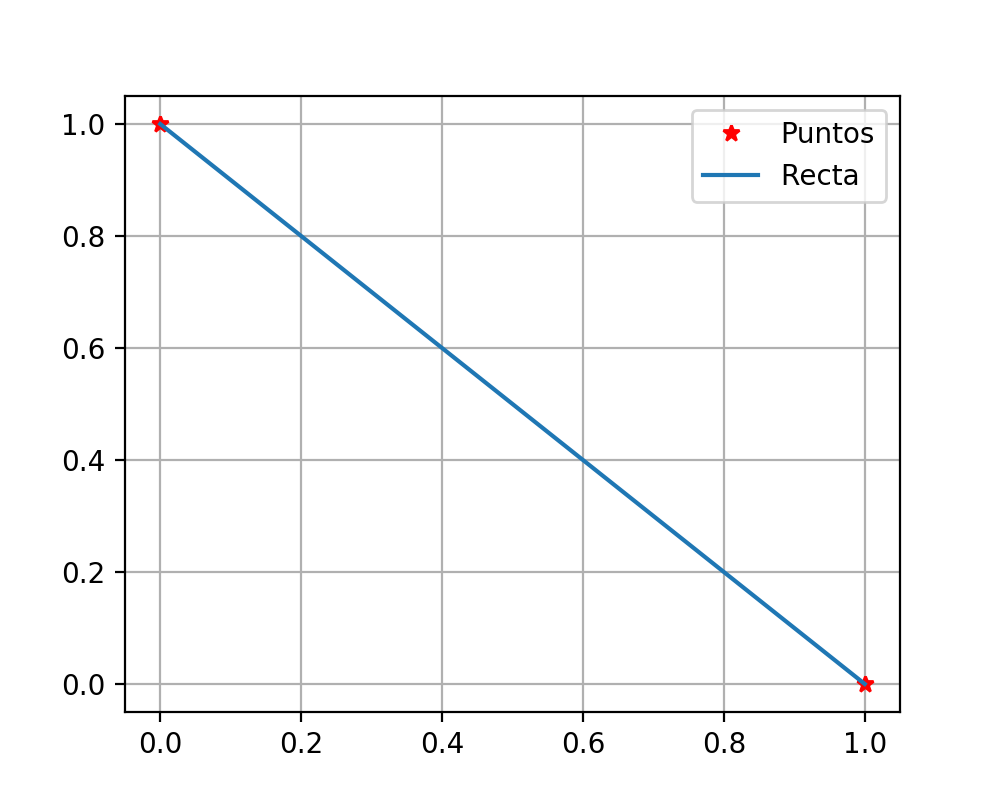

In [31]:
x=np.linspace(0,1,100)
y= b1*x+b0

plt.figure(figsize=(5,4))
plt.plot([P1[0],P2[0]],[P1[1],P2[1]],'r*',label='Puntos')
plt.plot(x,y, label='Recta')
plt.legend(loc='best')
plt.grid()
plt.show()

## Cuadrática

In [32]:
P1=[-1,1]
P2=[0,0]
P3=[1,1]

x=np.array([[1,-1,1],[1,0,0],[1,1,1]])
y=np.array([1,0,1])
b0,b1,b2 = np.linalg.inv(x).dot(y)
b0,b1,b2

(0.0, 0.0, 1.0)

In [33]:
sym.var('x')
y=b2*x**2+b1*x+b0
y

     2
1.0⋅x 

<IPython.core.display.Javascript object>


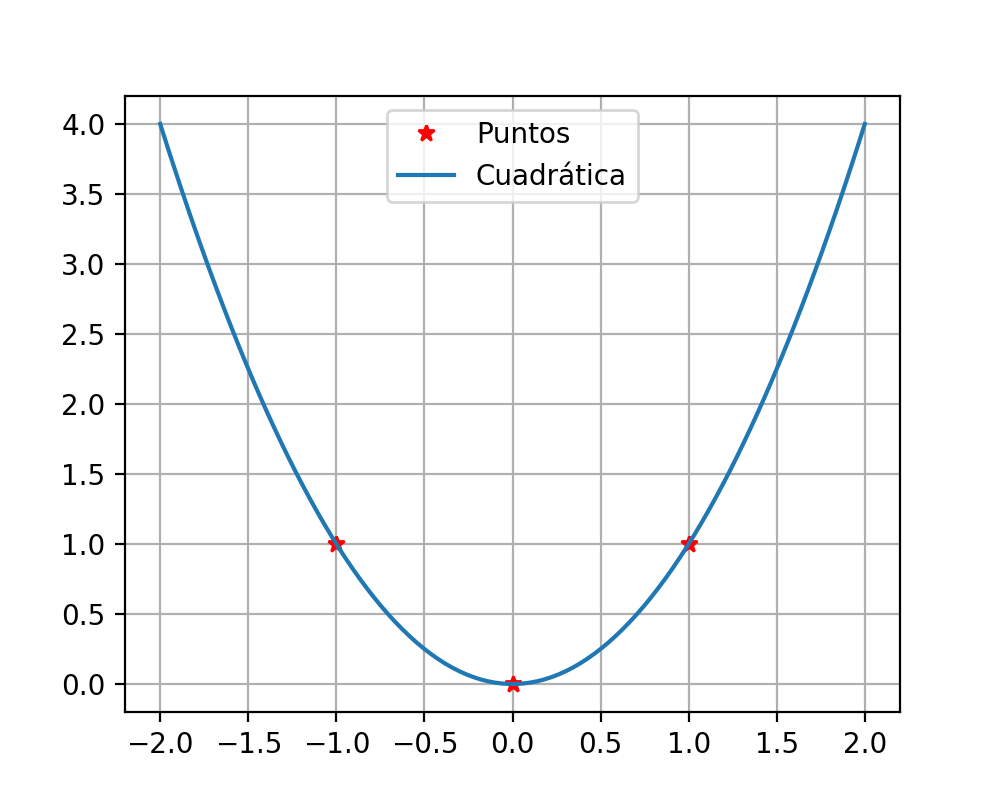

In [34]:
x=np.linspace(-2,2,100)
y=b2*x**2+b1*x+b0

plt.figure(figsize=(5,4))
plt.plot([P1[0],P2[0],P3[0]],[P1[1],P2[1],P3[1]],'r*',label='Puntos')
plt.plot(x,y, label='Cuadrática')
plt.legend(loc='best')
plt.grid()
plt.show()

## Datos random

In [95]:
x=np.linspace(0,1,50)
y=10*x+2+np.random.rand(50)
y

array([ 2.24617613,  3.08677611,  2.88457445,  2.7662521 ,  3.47073769,
        3.14109055,  3.51717315,  4.28859852,  4.04464197,  4.34202261,
        4.43936423,  4.94652234,  4.95183568,  4.9211551 ,  5.76008788,
        5.22351765,  6.11081942,  6.466693  ,  5.76317844,  6.51123573,
        7.05214047,  6.886232  ,  6.65355183,  6.8202422 ,  7.04755809,
        7.49977922,  7.46869565,  7.9730853 ,  7.80915503,  8.27679483,
        9.03852248,  8.70828359,  9.28199073,  9.30689363,  9.17395452,
        9.51422943,  9.4607826 , 10.23757069, 10.29461987, 10.08353001,
       10.78548586, 10.91086633, 10.77811241, 11.2372794 , 11.93203952,
       11.94199667, 12.05277545, 12.23240157, 12.67164326, 12.47559812])

<IPython.core.display.Javascript object>


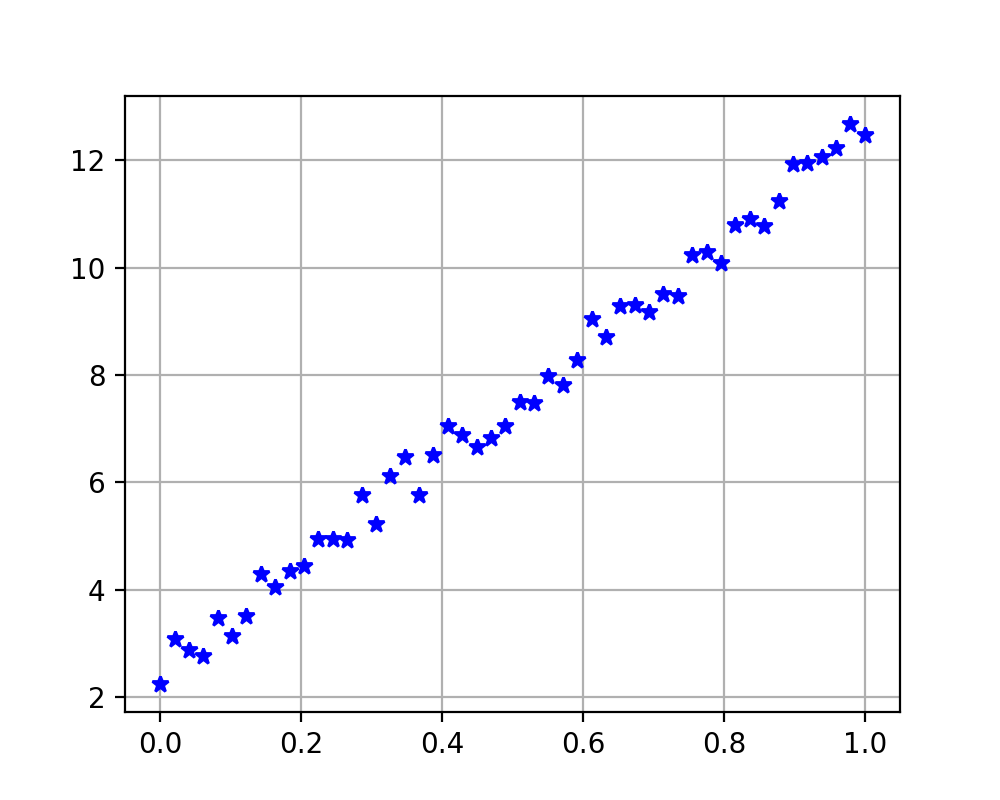

In [96]:
plt.figure(figsize=(5,4))
plt.plot(x,y,'b*')
plt.grid()
plt.show()

In [54]:
#import scipy.optimize as opt

In [97]:
def fun_obj1(b,x,y):
    return np.sum((y-b[0]-b[1]*x)**2)

def fun_obj2(b,x,y):
    X = np.array([x**1 for i in range(2)])
    return np.linalg.norm(y-X.dot(b))**2
b0= np.array([1,5])

In [98]:
res = opt.minimize(fun_obj1, b0, args =(x,y))
res, res.x

(      fun: 3.7223002367365923
  hess_inv: array([[ 0.03884908, -0.05768496],
        [-0.05768496,  0.11535034]])
       jac: array([-2.59280205e-06,  0.00000000e+00])
   message: 'Optimization terminated successfully.'
      nfev: 32
       nit: 7
      njev: 8
    status: 0
   success: True
         x: array([ 2.44430887, 10.09091273]),
 array([ 2.44430887, 10.09091273]))

In [99]:
#sym.var('x')
#y=res.x[0]*x+res.x[1]
#y

yhat= res.x[0]+res.x[1]*x
yhat

array([ 2.44430887,  2.65024587,  2.85618286,  3.06211986,  3.26805685,
        3.47399384,  3.67993084,  3.88586783,  4.09180483,  4.29774182,
        4.50367882,  4.70961581,  4.91555281,  5.1214898 ,  5.32742679,
        5.53336379,  5.73930078,  5.94523778,  6.15117477,  6.35711177,
        6.56304876,  6.76898576,  6.97492275,  7.18085974,  7.38679674,
        7.59273373,  7.79867073,  8.00460772,  8.21054472,  8.41648171,
        8.62241871,  8.8283557 ,  9.0342927 ,  9.24022969,  9.44616668,
        9.65210368,  9.85804067, 10.06397767, 10.26991466, 10.47585166,
       10.68178865, 10.88772565, 11.09366264, 11.29959963, 11.50553663,
       11.71147362, 11.91741062, 12.12334761, 12.32928461, 12.5352216 ])

In [100]:
np.shape(yhat)

(50,)

<IPython.core.display.Javascript object>


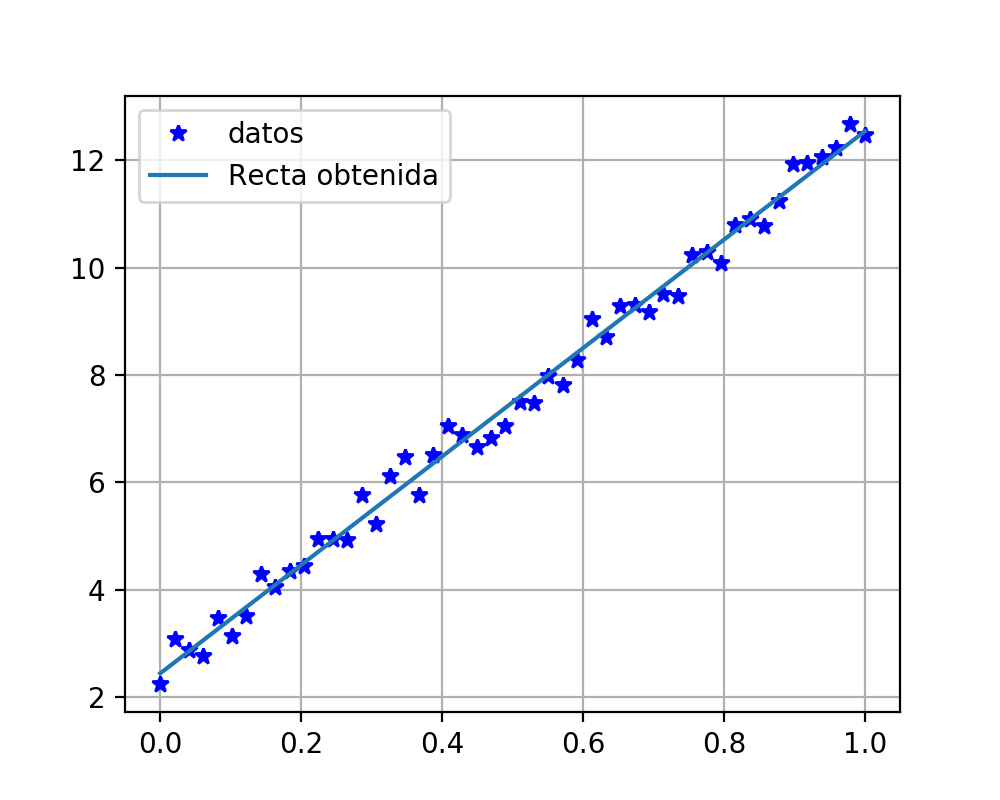

In [101]:
plt.figure(figsize=(5,4))
plt.plot(x,y,'b*', label='datos')
plt.plot(x,yhat, label='Recta obtenida')
plt.legend(loc='best')
plt.grid()
plt.show()

## Ajuste Polinomial

<IPython.core.display.Javascript object>


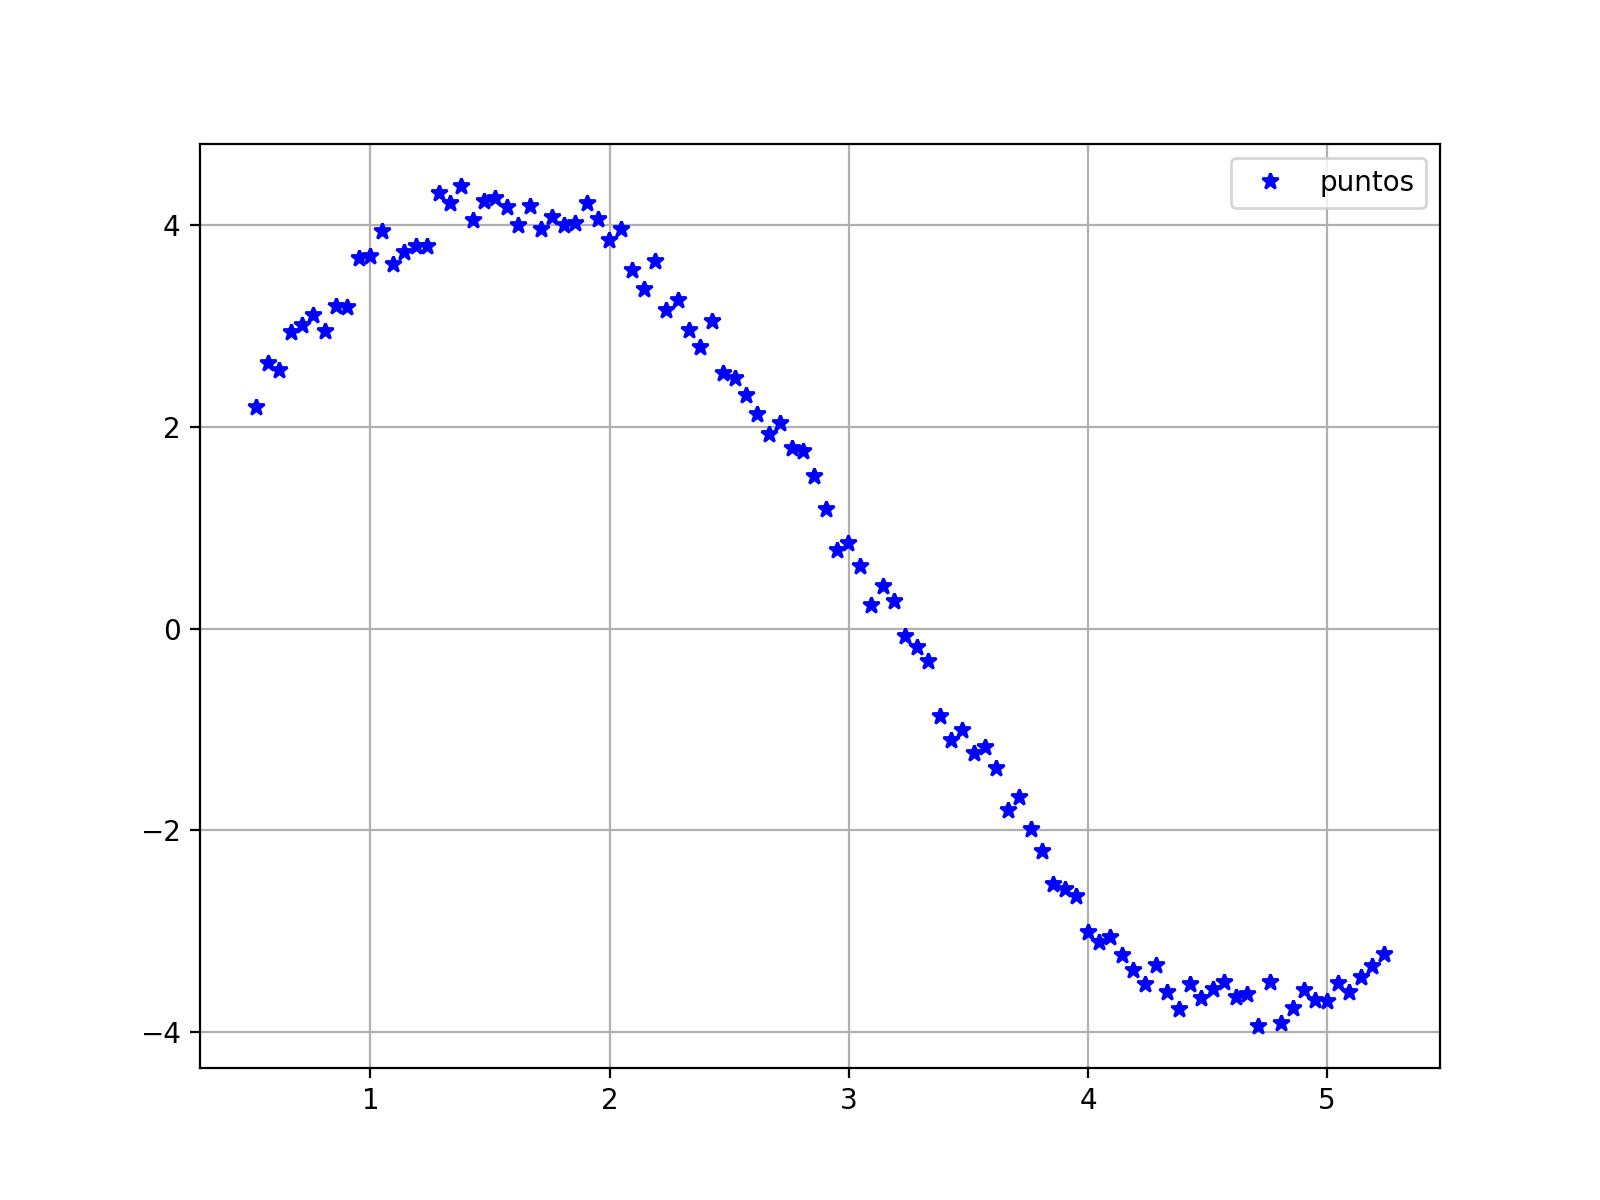

In [106]:
n = 100
x =np.linspace(np.pi/6,5*np.pi/3, n)
y = 4*np.sin(x) + 0.5*np.random.random(n)

plt.figure(figsize=(8,6))
plt.plot(x,y,'b*', label='puntos')
plt.legend(loc='best')
plt.grid()
plt.show()

In [107]:
res = opt.minimize(fun_obj1, b0, args =(x,y))
res, res.x

(      fun: 121.44021878058669
  hess_inv: array([[ 0.0269637 , -0.00762683],
        [-0.00762683,  0.0026484 ]])
       jac: array([2.86102295e-06, 3.81469727e-06])
   message: 'Optimization terminated successfully.'
      nfev: 32
       nit: 6
      njev: 8
    status: 0
   success: True
         x: array([ 6.51822226, -2.07881685]),
 array([ 6.51822226, -2.07881685]))

In [108]:
yhat= res.x[0]+res.x[1]*x
yhat

array([ 5.4297563 ,  5.33080485,  5.2318534 ,  5.13290195,  5.0339505 ,
        4.93499905,  4.8360476 ,  4.73709614,  4.63814469,  4.53919324,
        4.44024179,  4.34129034,  4.24233889,  4.14338744,  4.04443599,
        3.94548454,  3.84653309,  3.74758164,  3.64863019,  3.54967873,
        3.45072728,  3.35177583,  3.25282438,  3.15387293,  3.05492148,
        2.95597003,  2.85701858,  2.75806713,  2.65911568,  2.56016423,
        2.46121278,  2.36226132,  2.26330987,  2.16435842,  2.06540697,
        1.96645552,  1.86750407,  1.76855262,  1.66960117,  1.57064972,
        1.47169827,  1.37274682,  1.27379537,  1.17484391,  1.07589246,
        0.97694101,  0.87798956,  0.77903811,  0.68008666,  0.58113521,
        0.48218376,  0.38323231,  0.28428086,  0.18532941,  0.08637796,
       -0.0125735 , -0.11152495, -0.2104764 , -0.30942785, -0.4083793 ,
       -0.50733075, -0.6062822 , -0.70523365, -0.8041851 , -0.90313655,
       -1.002088  , -1.10103945, -1.19999091, -1.29894236, -1.39

<IPython.core.display.Javascript object>


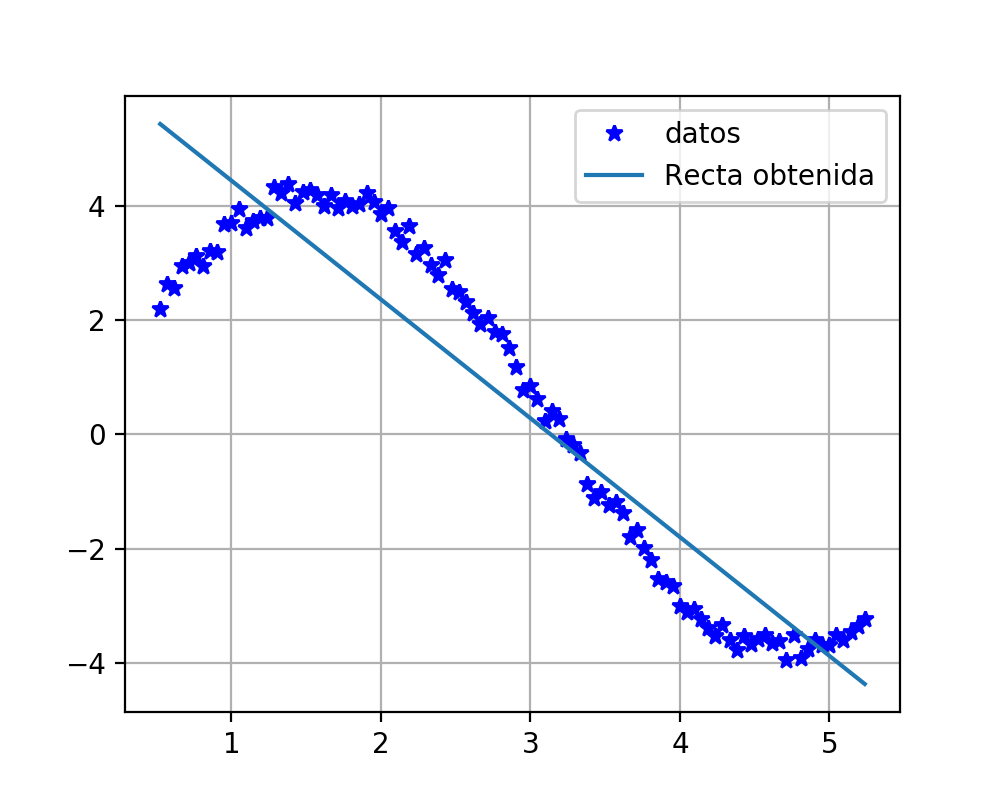

In [109]:
plt.figure(figsize=(5,4))
plt.plot(x,y,'b*', label='datos')
plt.plot(x,yhat, label='Recta obtenida')
plt.legend(loc='best')
plt.grid()
plt.show()

 Esto no se puede obtener por lo que tenemos que subir de grado el polinomio

In [118]:
def obj2(b,x,y):
    return np.sum((y-b[0]-b[1]*x-b[2]*x**2)**2)
b0= np.random.random((3,))

<IPython.core.display.Javascript object>


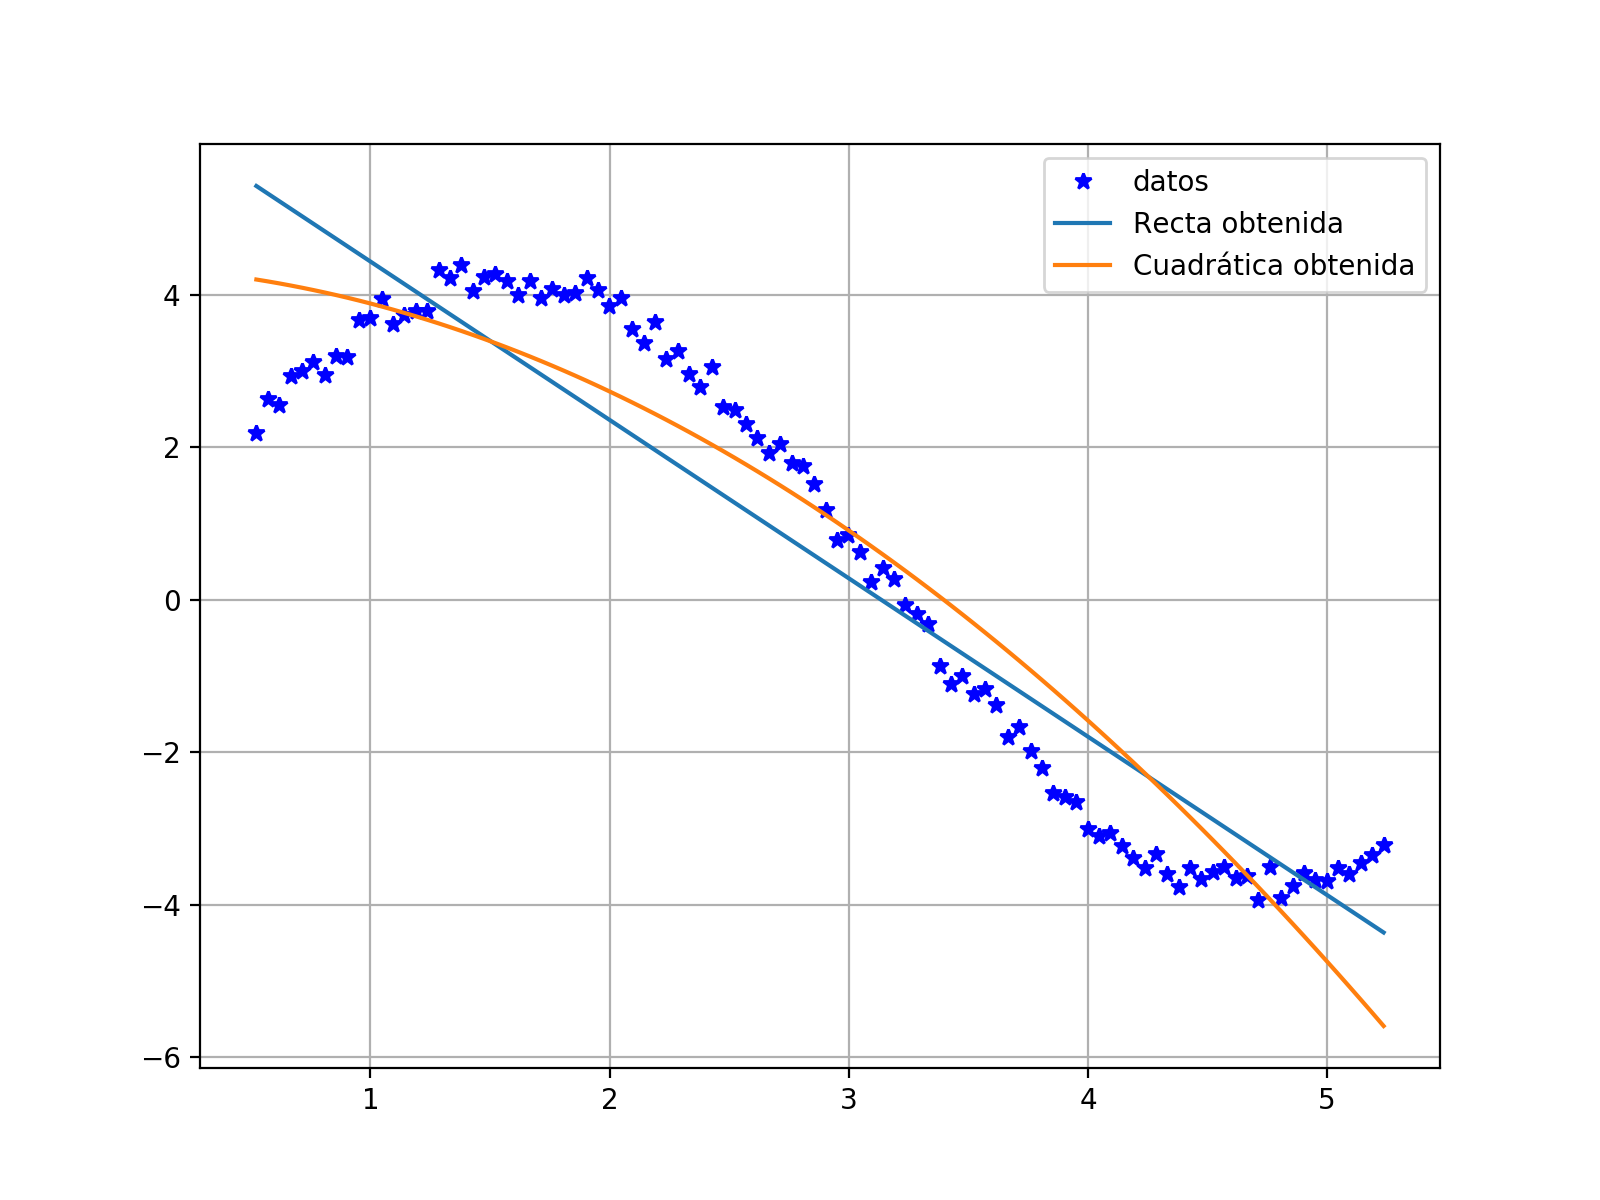

In [119]:
res = opt.minimize(obj2, b0, args =(x,y))
yhat2= res.x[0]+res.x[1]*x+res.x[2]*x**2

plt.figure(figsize=(8,6))
plt.plot(x,y,'b*', label='datos')
plt.plot(x,yhat, label='Recta obtenida')
plt.plot(x,yhat2, label='Cuadrática obtenida')
plt.legend(loc='best')
plt.grid()
plt.show()

Otro grado más

In [120]:
def obj3(b,x,y):
    return np.sum((y-b[0]-b[1]*x-b[2]*x**2-b[3]*x**3)**2)
b0= np.random.random((4,))

<IPython.core.display.Javascript object>


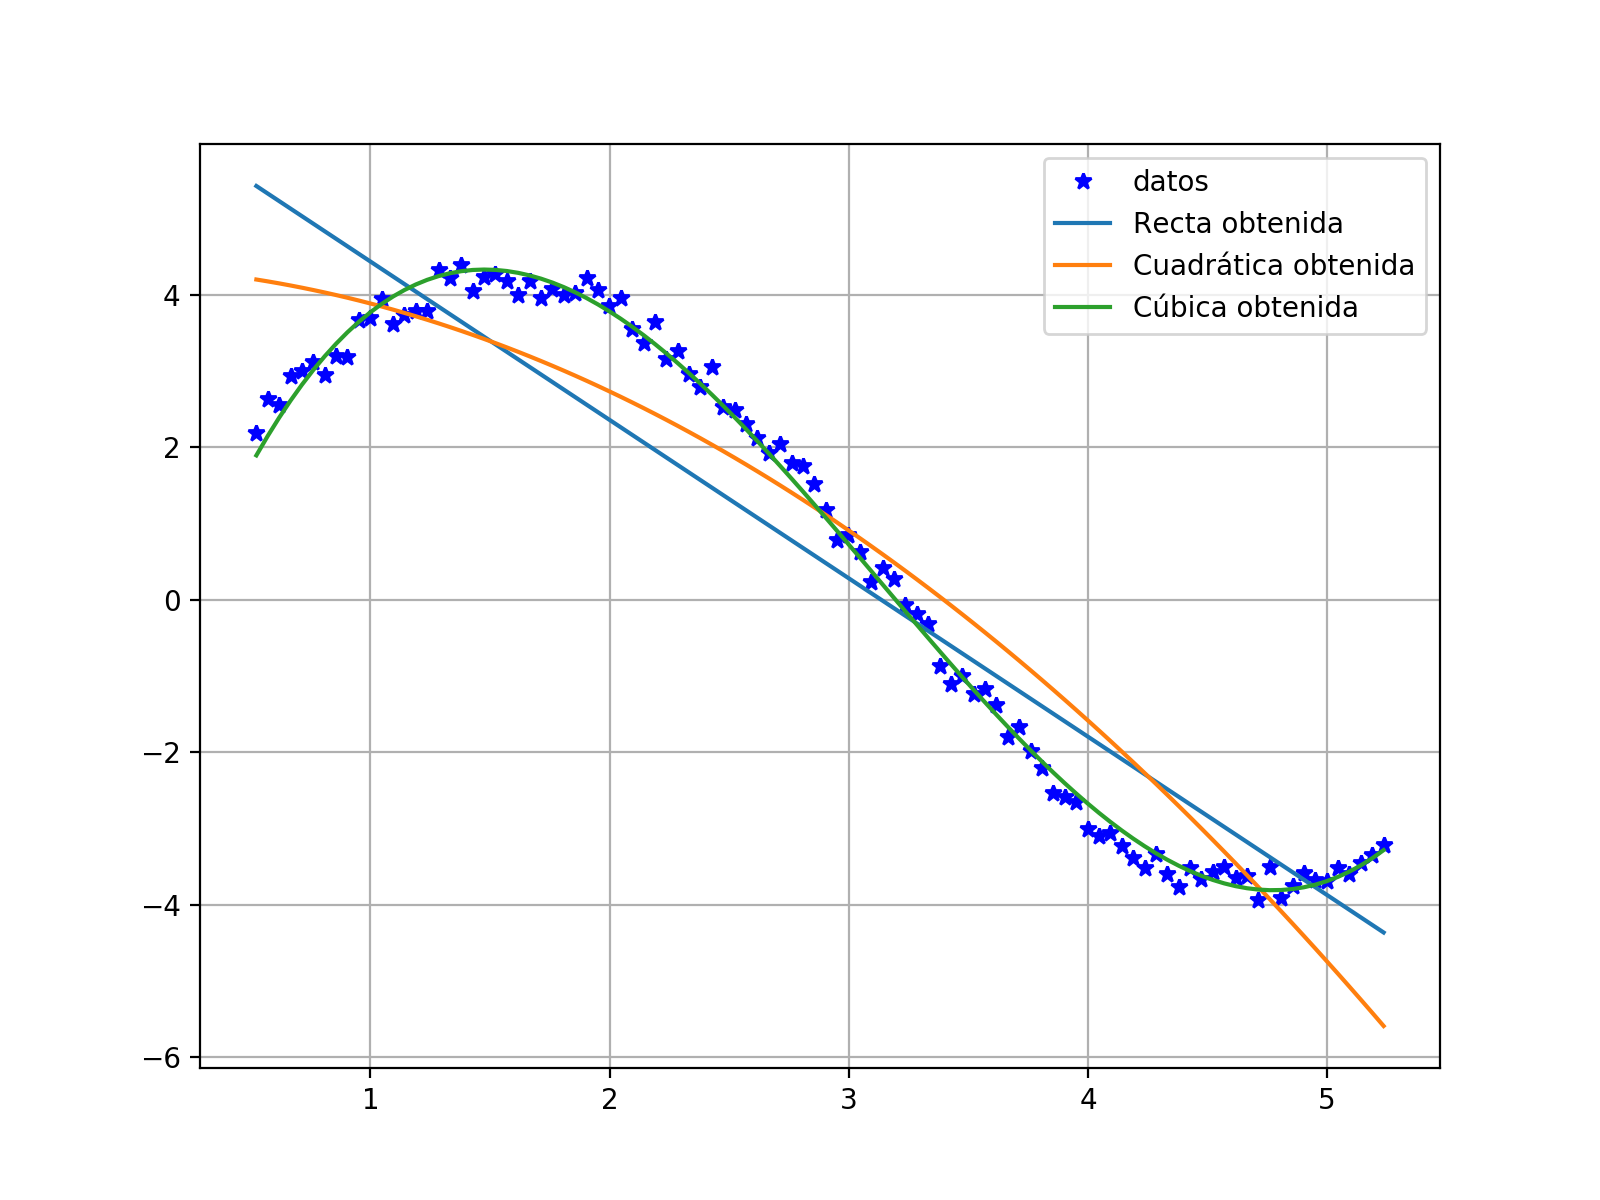

In [123]:
res = opt.minimize(obj3, b0, args =(x,y))
yhat3= res.x[0]+res.x[1]*x+res.x[2]*x**2+res.x[3]*x**3

plt.figure(figsize=(8,6))
plt.plot(x,y,'b*', label='datos')
plt.plot(x,yhat, label='Recta obtenida')
plt.plot(x,yhat2, label='Cuadrática obtenida')
plt.plot(x,yhat3, label='Cúbica obtenida')
plt.legend(loc='best')
plt.grid()
plt.show()